In [1]:
import numpy as np
import skimage as ski
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpltimg
import os
import cv2
from PIL import Image
import datetime

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, BatchNormalization, Dropout, Dense
from keras.utils import conv_utils 

In [3]:
dataset = []
labels = []
# importing the dataset first for train/test 
# labels are binary (1, 0)
# 1 stands for infected
# 0 stands for control

In [4]:
inf_imgs=os.listdir ('C:\\Users\\MonPc\\Desktop\\version 2.0\\infected')
for i, image_name in enumerate(inf_imgs):
    img = cv2.imread('C:\\Users\\MonPc\\Desktop\\version 2.0\\infected\\' +  image_name)
    img = Image.fromarray(img, mode='RGB')
    img = img.resize((100, 100))
    dataset.append(np.array(img))
    labels.append(1)

In [5]:
cntrl_imgs=os.listdir('C:\\Users\\MonPc\\Desktop\\version 2.0\\control')
for i, image_name in enumerate(cntrl_imgs):
    img = cv2.imread('C:\\Users\\MonPc\\Desktop\\version 2.0\\control\\' + image_name)
    img = Image.fromarray(img, mode='RGB')
    img = img.resize((100, 100))
    dataset.append(np.array(img))
    labels.append(0)

In [6]:
# converting dataset and labels from lists to np.ndarray() for the upcoming work
dataset = np.array(dataset)
labels = np.array(labels)

In [7]:
#splitting the dataset for the training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.20, random_state = 0)

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
#creatin za model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.add(Activation('sigmoid')) 

In [10]:
#we are performing a binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49, 49, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0

In [11]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train, y_train, batch_size= 32, verbose = 'auto', epochs = 100, validation_data = (x_test, y_test), shuffle = False, callbacks=[tensorboard_callback])

Epoch 1/100
4/4 [==============================] - 7s 1s/step - loss: 1.6947 - accuracy: 0.4554 - val_loss: 0.6861 - val_accuracy: 0.5517
Epoch 2/100
4/4 [==============================] - 2s 549ms/step - loss: 0.7750 - accuracy: 0.5625 - val_loss: 0.6954 - val_accuracy: 0.4483
Epoch 3/100
4/4 [==============================] - 2s 545ms/step - loss: 0.6959 - accuracy: 0.5446 - val_loss: 0.6948 - val_accuracy: 0.4483
Epoch 4/100
4/4 [==============================] - 2s 530ms/step - loss: 0.6720 - accuracy: 0.6071 - val_loss: 0.6933 - val_accuracy: 0.4483
Epoch 5/100
4/4 [==============================] - 2s 523ms/step - loss: 0.6520 - accuracy: 0.7946 - val_loss: 0.6930 - val_accuracy: 0.4483
Epoch 6/100
4/4 [==============================] - 2s 552ms/step - loss: 0.6139 - accuracy: 0.8304 - val_loss: 0.6906 - val_accuracy: 0.6552
Epoch 7/100
4/4 [==============================] - 2s 555ms/step - loss: 0.5407 - accuracy: 0.8125 - val_loss: 0.6873 - val_accuracy: 0.5517
Epoch 8/100
4/4 

In [12]:
model.save('trialmodel2_100epochs.h5')

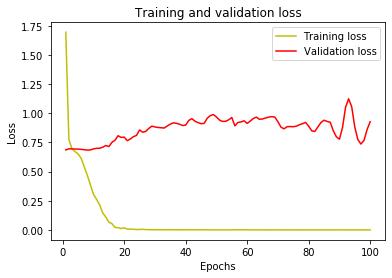

In [13]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

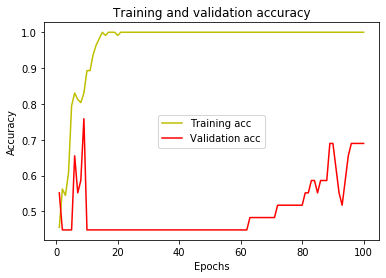

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from keras.models import load_model
model1 = load_model('trialmodel1_100epochs.h5')
#For 300 epochs
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 1s 635ms/step - loss: 0.9272 - accuracy: 0.6897
Accuracy =  68.96551847457886 %


In [16]:
from sklearn.metrics import confusion_matrix
mythreshold=0.908
y_pred = (model.predict(x_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[13  0]
 [15  1]]
